# The Movie DB
In a world… where movies made an estimated $41.7 billion in 2018, the film industry is more popular than ever. But what movies make the most money at the box office? How much does a director matter? Or the budget? For some movies, it's "You had me at 'Hello.'" For others, the trailer falls short of expectations and you think "What we have here is a failure to communicate."
## Introduction
In this notebook we will analyze a dataset containing 3000 movies with their characteristics and their box office revenue. We aim at predicting the box office revenue of never seen movies and for  doing this we will use *regression* since it is known to be employed in prediction applications (such as prediction of stock market indices). Also *classification* is used for prediction, but it tries to predict categorical values, while we have to deal with revenue, which is a continuous value, hence regression is used.

In the first part of this notebook we will look at the dataset and try to clean some missing values ant to format some values in order to use them later.


In [1]:
import pandas as pd
import json
import ast    #Abstract Syntax Tree
import itertools
import numpy as np 
from matplotlib import pyplot as plt  
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

sns.set()
pd.set_option('display.max_columns', None)


## Data preprocessing
The overall dataset contains over 7000 movies, but 3000 of them are suitable for training since the the `revenue` attribute is included.  
Let's have a look to the train dataset:

In [2]:
train_set = pd.read_csv('tmdb-box-office-prediction/train.csv')
test_set = pd.read_csv('tmdb-box-office-prediction/test.csv')
train_set.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [3]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

And also to the test set:

In [4]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4398 non-null   int64  
 1   belongs_to_collection  877 non-null    object 
 2   budget                 4398 non-null   int64  
 3   genres                 4382 non-null   object 
 4   homepage               1420 non-null   object 
 5   imdb_id                4398 non-null   object 
 6   original_language      4398 non-null   object 
 7   original_title         4398 non-null   object 
 8   overview               4384 non-null   object 
 9   popularity             4398 non-null   float64
 10  poster_path            4397 non-null   object 
 11  production_companies   4140 non-null   object 
 12  production_countries   4296 non-null   object 
 13  release_date           4397 non-null   object 
 14  runtime                4394 non-null   float64
 15  spok

As we can see from the tables above, the available information are:
- `id`: A unique identifier, not so useful for prediction;
- `belongs to collection`: Tells to which collection the movie belongs to, if any;
- `budget`: The budget needed for producing the movie;
- `genres`: Genres list to which the movie belongs;
- `homepage`: The URL of the movie's homepage, if any;
- `imdb_id`: A unique identifier represented as a string;
- `original_language`: The movie's original language;
- `original_title`: The movie's original title (in its original language);
- `overview`: A text that describe, in broad terms, the movie;
- `popularity`: A numerical value representing popularity;
- `poster_path`: An URI that indetifies the movie's poster;
- `production_companies`: The companies involved in the production;
- `production_countries`: The countries in which the movie is produced;
- `release_date`: Month/day/year on which the movie was released;
- `runtime`: The duration (in minutes) of the movie;
- `spoken_languages`: The languages spoken in the movie;
- `status`: If the movie is yet released or not;
- `tagline`: The tagline of the movie, if any;
- `title`: The title of the movie in english;
- `Keywords`: The keywords of the movie;
- `cast`: The actors involved in the movie;
- `crew`: The directors and other people employed in the making of the movie;
- `revenue`: The movie's box office revenue.


From the `info()` function is shown that fortunately all the `train_set` movies have a non-null revenue, so we don't have to delete any row. We can also note that there are very few null values, the only columns with a lot of null values are `belongs_to_collection` and `homepage` but a null value in this two columns simply menas that the movie doesn't have a homepage or does not belong to any collection and these information can be exploited for prediction.

The `release_date` column of the `test_set` has 1 null value, but since is only one it can be inserted manually.

In [5]:
for date,title,index in zip (test_set['release_date'], test_set['title'], enumerate(test_set['release_date'])):
    if not type(date) == str:
        print(title, index)

Jails, Hospitals & Hip-Hop (828, nan)


In [6]:
test_set['release_date'][828] = '05/01/00'

The null values of the runtime column can be filled with its mean value.

In [7]:
train_set['runtime'] = train_set['runtime'].fillna(train_set['runtime'].mean())
test_set['runtime'] = test_set['runtime'].fillna(test_set['runtime'].mean())
#Fill null value for the runtime attribute

We can also note that there are some columns that are formatted almost as JSON documents. In particular, the columns  are formatted exactly as Python's *list* of *dictionaries*. The considered columns are: 
- `belongs_to_collection`
- `genres` 
- `production_companies`
-`production_countries`
-`spoken_languages`
-`Keywords`
-`cast`
-`crew`.    
We can extract important values from those data, ignoring useless values (e.g. `id`).

To format correctly these information is used the *Abstract Syntax Tree* (the `ast` library), that recognize Python code and transform it in its interpreted value. 

In [8]:
json_columns = ['belongs_to_collection', 
                'genres', 
                'production_companies', 
                'production_countries', 
                'spoken_languages', 
                'Keywords', 
                'cast', 
                'crew']


def string_to_tree(df):   #We will infact use the ast module to parse the string as python understandable code
    for column in json_columns:
        df[column] = df[column].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x))
    return df


train_set = string_to_tree(train_set)
test_set = string_to_tree(test_set)

#DIRECTORS = set()
directors = train_set['crew'].apply(lambda x: [i['name'] for i in x if ('job' in i and (i['job'] == 'Director'))] if x!={} else [])
directors = directors.rename('directors')
train_set = train_set.join(directors)
directors = test_set['crew'].apply(lambda x: [i['name'] for i in x if ('job' in i and (i['job'] == 'Director'))] if x!={} else [])
directors = directors.rename('directors')
test_set = test_set.join(directors)


for column in json_columns:
    train_set[column] = train_set[column].apply(lambda x: [i['name'] for i in x] if x!={} else [])
    test_set[column] = test_set[column].apply(lambda x: [i['name'] for i in x] if x!={} else [])

train_set.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,directors
0,1,[Hot Tub Time Machine Collection],14000000,[Comedy],NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[Paramount Pictures, United Artists, Metro-Gol...",[United States of America],2/20/15,93.0,[English],Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[time travel, sequel, hot tub, duringcreditsst...","[Rob Corddry, Craig Robinson, Clark Duke, Adam...","[Kelly Cantley, Steve Pink, Josh Heald, Josh H...",12314651,[Steve Pink]
1,2,[The Princess Diaries Collection],40000000,"[Comedy, Drama, Family, Romance]",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,[Walt Disney Pictures],[United States of America],8/6/04,113.0,[English],Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[coronation, duty, marriage, falling in love]","[Anne Hathaway, Julie Andrews, H√©ctor Elizond...","[Garry Marshall, Charles Minsky, John Debney, ...",95149435,[Garry Marshall]
2,3,[],3300000,[Drama],http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[Bold Films, Blumhouse Productions, Right of W...",[United States of America],10/10/14,105.0,[English],Released,The road to greatness can take you to the edge.,Whiplash,"[jazz, obsession, conservatory, music teacher,...","[Miles Teller, J.K. Simmons, Melissa Benoist, ...","[Terri Taylor, Richard Henderson, Jeffrey Stot...",13092000,[Damien Chazelle]
3,4,[],1200000,"[Thriller, Drama]",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,[],[India],3/9/12,122.0,"[English, हिन्दी]",Released,NaN,Kahaani,"[mystery, bollywood, police corruption, crime,...","[Vidya Balan, Nawazuddin Siddiqui, Parambrata ...","[Sujoy Ghosh, Sujoy Ghosh, Sujoy Ghosh]",16000000,[Sujoy Ghosh]
4,5,[],0,"[Action, Thriller]",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,[],[South Korea],2/5/09,118.0,[한국어/조선말],Released,NaN,Marine Boy,[],"[Kim Kang-woo, Jo Jae-hyeon, Park Si-yeon, Kim...","[Jong-seok Yoon, Jong-seok Yoon]",3923970,[Jong-seok Yoon]


## Data Extraction and Selection
Now that the data are correctly formatted and the whole set is more usable we can search for the data that affect the revenue of a movie.   

First of all the value `1` is assigned `belongs_to_colection` and `homepage` of all the movies that have them and `0` is assigned to the movies that do not have them.

In [9]:
train_set['belongs_to_collection'] = [1 if (not x == []) else 0 for x in train_set['belongs_to_collection']]
train_set['homepage'] = [1 if (type(x) == str) else 0 for x in train_set['homepage']]

Now the data can be plotted in order to visualize which are the most relevant features

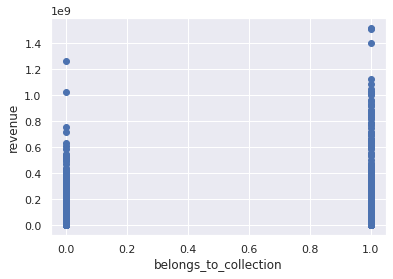

In [10]:
def scatter_plot(column):
    x = train_set[column]
    y = train_set['revenue']

    plt.scatter(x,y)
    plt.xlabel(column)
    plt.ylabel("revenue")
    plt.show()

scatter_plot('belongs_to_collection')

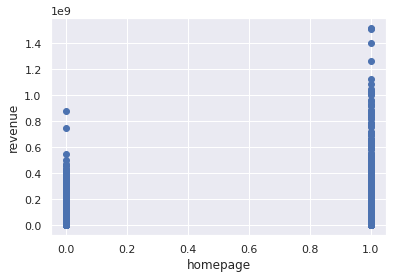

In [11]:
scatter_plot('homepage')

In [12]:
train_set['tagline']=[1 if type(status) == str else 0 for status in train_set['tagline']]

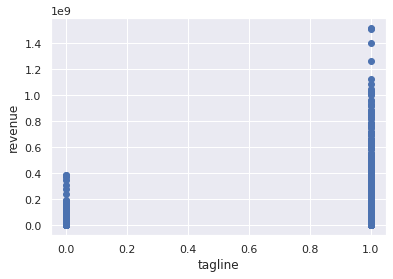

In [13]:
scatter_plot('tagline')

We can note that movies that belong to a collection, have homepage and have a tagline earn significantly more than the one that does not have these features.

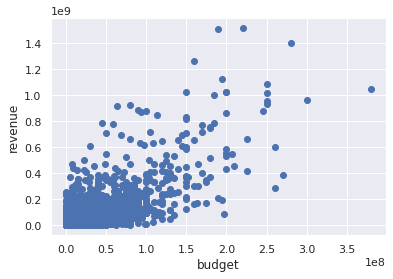

In [14]:
scatter_plot('budget')

Clearly increasing the budget also the revenue rise, this might be trivial but we want to be shure to use relevant data.

We also have to consider the `release_date` column because, quoting the introduction of this dataset 
> movies made an estimated $41.7 billion in 2018, the film industry is more popular than ever

So we can guess that today the film industry earns more than in the past.  
But to extract information about the release date we have to process it because it is only provided as a string; we can extract year, month and day. 

In [15]:
def format_date(df=train_set):
    df['year'] = [0 for x in df['release_date']]
    df['month'] = [0 for x in df['release_date']]
    df['day'] = [0 for x in df['release_date']]
    c = 0
    for date in df['release_date']:
        if (type(date) == str):
            m_d_y = date.split('/')
            if int(m_d_y[2])<21:
                m_d_y[2] = '20' + m_d_y[2]
            else:
                m_d_y[2] = '19' + m_d_y[2]
            df['year'][c] = int(m_d_y[2])
            df['month'][c] = int(m_d_y[0])
            df['day'][c] = int(m_d_y[1])
        c += 1

In [16]:
format_date(train_set)
test_set['release_date'].fillna("01/01/00")
format_date(test_set)
train_set[['year','month','day']].head()

,year,month,day
0,2015,2,20
1,2004,8,6
2,2014,10,10
3,2012,3,9
4,2009,2,5


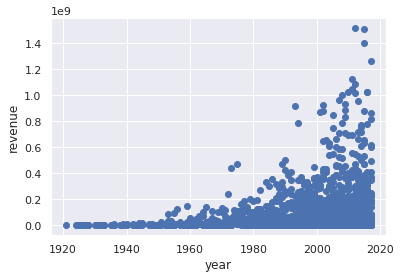

In [17]:
scatter_plot('year')

The above scatter plot shows that the year is really influent on the revenue of the movie, and in particular, as the years pass the revenue increase. 

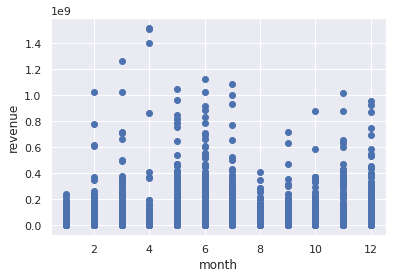

In [18]:
scatter_plot('month')

Unfortunately the month does not tell us a lot about the revenue, the data seem noisy. However, it's clear that in June and in May movies earn more than in January or in August.   
We can try to divide a year in quarters to generalize.

In [19]:
quarter = pd.Series()
quarter = quarter.append(pd.Series([int(q/4)+1 for q in train_set['month']]))
train_set = train_set.join(quarter.rename('quarter'))
train_set['quarter'].head()

0    1
1    3
2    3
3    1
4    1
Name: quarter, dtype: int64

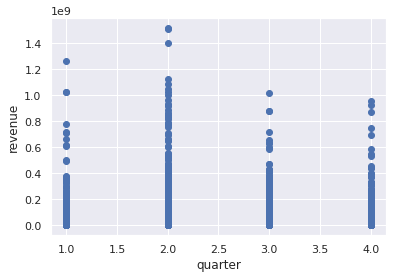

In [20]:
scatter_plot('quarter')

Now the relation between months and revenue is clearer and we can tell that movies released from May to July earn more than the others

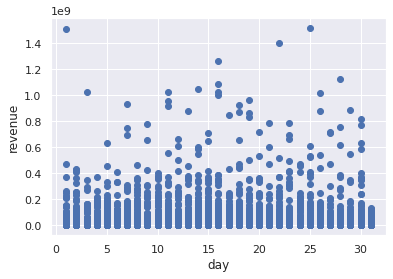

In [21]:
scatter_plot('day')

Unfortunately cannot be extracted relevant information from the day of the month.

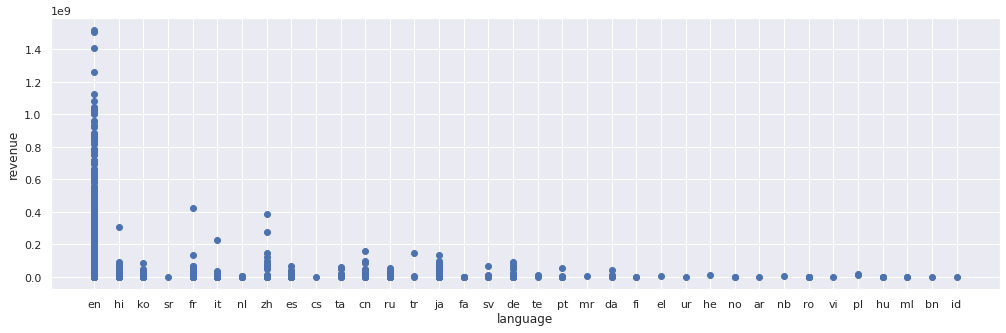

In [22]:
x = train_set['original_language']
y = train_set['revenue']

fig = plt.figure(figsize=(17, 5))
ax = fig.add_subplot(111)
ax.scatter(x,y)
plt.xlabel("language")
plt.ylabel("revenue")
plt.show()

The language is a relevant feature, but it seems that english completely shadows other languages

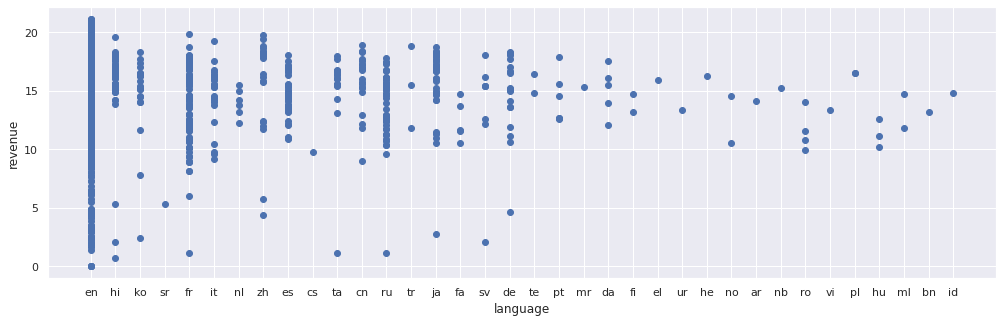

In [23]:
x = train_set['original_language']
y = np.log(train_set['revenue'])

fig = plt.figure(figsize=(17, 5))
ax = fig.add_subplot(111)
ax.scatter(x,y)
plt.xlabel("language")
plt.ylabel("revenue")
plt.show()

Cosidering the natural logarithm of the revenue $\ln (revenue)$ we can observe that other languages are not completely overshadowed by English. Anyway the language is still a good metric to predict the revenue

In [24]:
train_set['n_genres'] = [len(train_set['genres'][i]) for i in range(len(train_set['genres']))]

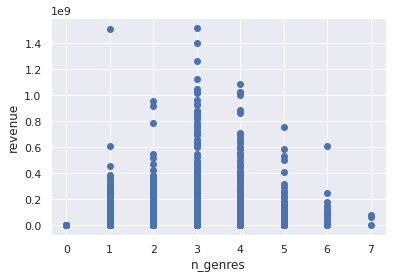

In [25]:
scatter_plot('n_genres')

It seems that movies that cover 3 genres usually earn more than the others

In [26]:

def add_columns(SET, column, df=train_set):
    for elem in SET:
        df[elem] = [1 if (elem in x) else 0 for x in df[column]] 

def series_to_set(column, source_df = train_set):
    SET = set()
    for each_list in source_df[column]:
        for elem in each_list:
            SET.add(elem)
    return SET

def series_of_lists_to_columns(column, source_df = train_set):
    SET = series_to_set(column, source_df)
        

    add_columns(SET, column)
    
    return SET


def get_most_common(SET, column, cardinality=-1, source_df=train_set):
    df = pd.DataFrame(index=SET)
    df['occurences'] = [0 for x in enumerate(SET)]
    for x in source_df[column]:
        for elem in x:
            df.loc[elem]['occurences'] += 1
    commons = df.sort_values('occurences', ascending=False)[:cardinality].index
    return commons

In the following code the series of lists created from the JSON like objects of the dataframe will be transformed into columns that contain `1` or `0`, depending the fact that a movie has or not that feature. For instance, if we consider an example where there are 3 movies with an associated list of genres:
- movie_1:[Genre1]
- movie_2:[Genre2, Genre3]
- movie_3:[Genre1, Genre3, Genre2]


The associated colums will look like this Example



| Movie   |Genre1 | Genre2 | Genre3|
| ------- | :---: | :----: | :---: |
| movie_1 | 1     | 0      | 0     |
| movie_2 | 0     | 1      | 1     |
| movie_3 | 1     | 1      | 1     |


And this  Dataframe will be merged with the already existing one.

In [27]:
GENRES = series_of_lists_to_columns('genres')

In [28]:
LANGUAGES = series_of_lists_to_columns('spoken_languages')

In [29]:
PROD_COUNTRIES = series_to_set('production_countries')
PROD_COUNTRIES = get_most_common(PROD_COUNTRIES, 'production_countries')
add_columns(PROD_COUNTRIES, 'production_countries')
PROD_COMPANIES = series_to_set('production_companies')
PROD_COMPANIES = get_most_common(PROD_COMPANIES, 'production_companies', 500)
add_columns(PROD_COMPANIES, 'production_companies')
sorted_data = train_set.sort_values('revenue', ascending=False)
profitable_movies = sorted_data[:200]
DIRECTORS = series_to_set('directors')
DIRECTORS = get_most_common(DIRECTORS, 'directors', 500)
DIRECTORS = DIRECTORS.union(series_to_set('directors', source_df=profitable_movies))

train_set['has_famous_director'] = [1 if len(DIRECTORS.intersection(directors)) else 0 for directors in train_set['crew']]

Obviously we cannot consider each  director as a unique column since they are a lot and the model will surely be overfitted and will not be able to generalize well. But is not good to not consider at all the movie directors, so we check if a movie has a famous director. The code check the following condition: $$movie director \in \{director | director \text{ is common or worked in profitable movie}\}$$

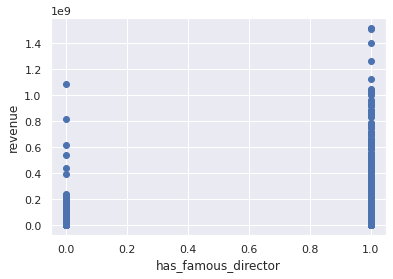

In [30]:
scatter_plot('has_famous_director')

From this plot it's clear that the director is a very important feature for the revenue of the movie

In [31]:
KEYWORDS = series_to_set('Keywords')
key_df = pd.DataFrame(index=KEYWORDS)
key_df['occurences'] = [0 for x in enumerate(KEYWORDS)]
for keys in train_set['Keywords']:
    for key in keys:
        key_df.loc[key]['occurences'] += 1
KEYWORDS = key_df.sort_values('occurences', ascending=False)[:400].index

#add_columns(KEYWORDS, 'Keywords')

In [32]:
CAST = series_to_set('cast')
cast = set()
for country in PROD_COUNTRIES:
    df = train_set[['cast', country]]
    c = 0
    for e in train_set[country]:
        if (e != 1):
            df = df.drop(c)
        c += 1
    cast = cast.union(get_most_common(CAST, 'cast', int(800*(len(df[country])/3000)), df))

sorted_data = train_set.sort_values('revenue', ascending=False)
profitable_movies = sorted_data[:100]
cast = cast.union(series_to_set('cast', source_df=profitable_movies))

CAST = cast
#add_columns(CAST, 'cast')
train_set['famous_actors'] = [len(CAST.intersection(actors)) for actors in train_set['cast']]

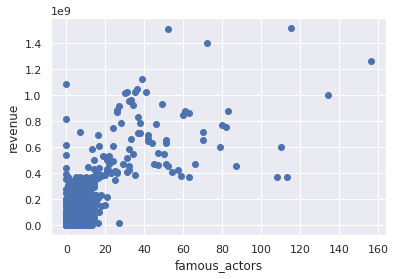

In [33]:
scatter_plot('famous_actors')

In the above plot we don't only consider if a movie has or not a famous actor working in it but we also consider the number of famous actors in a movie. $$\text{famous_actors}_{movie_i} = |actors_{movie_i} \cap actors_{famous}|$$

In [37]:
add_columns(GENRES, 'genres', df=test_set)
add_columns(LANGUAGES, 'spoken_languages', df=test_set)
add_columns(PROD_COMPANIES, 'production_companies', df=test_set)
add_columns(PROD_COUNTRIES, 'production_countries', df=test_set)

    

test_set['belongs_to_collection'] = [1 if (not x == []) else 0 for x in test_set['belongs_to_collection']]
test_set['homepage'] = [1 if (type(x) == str) else 0 for x in test_set['homepage']]
test_set['n_genres'] = [len(test_set['genres'][i]) for i in range(len(test_set['genres']))]
test_set['tagline']=[1 if type(status) == str else 0 for status in test_set['tagline']]
test_set['has_famous_director'] = [1 if len(DIRECTORS.intersection(directors)) else 0 for directors in test_set['crew']]
test_set['famous_actors'] = [len(CAST.intersection(actors)) for actors in test_set['cast']]

quarter = pd.Series()
quarter = quarter.append(pd.Series([int(q/4)+1 for q in test_set['month']]))
test_set = test_set.join(quarter.rename('quarter'))

<AxesSubplot:xlabel='revenue'>

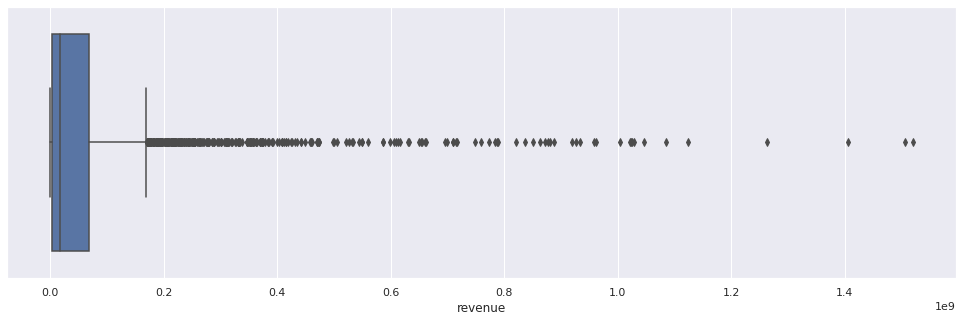

In [38]:
fig = plt.figure(figsize=(17, 5))
ax = fig.add_subplot(111)
sns.boxplot(x=train_set['revenue'], ax=ax)

By looking at the box plot it seems that the revenue is not evenly distributed and we for sure have to detect outliers since **regression** is sensitive to outliers

In [39]:
factor = 5
upper_lim = train_set['revenue'].mean () + train_set['revenue'].std () * factor
lower_lim = train_set['revenue'].mean () - train_set['revenue'].std () * factor
print("upper_lim:", upper_lim)
print("lower_lim:", lower_lim)

upper_lim: 754387483.5687587
lower_lim: -620935779.7914255


Movie with a revenue higher than `upper_lim` will be discarded

In [40]:
train_set['log_revenue'] = np.log(train_set['revenue'])

<AxesSubplot:xlabel='log_revenue'>

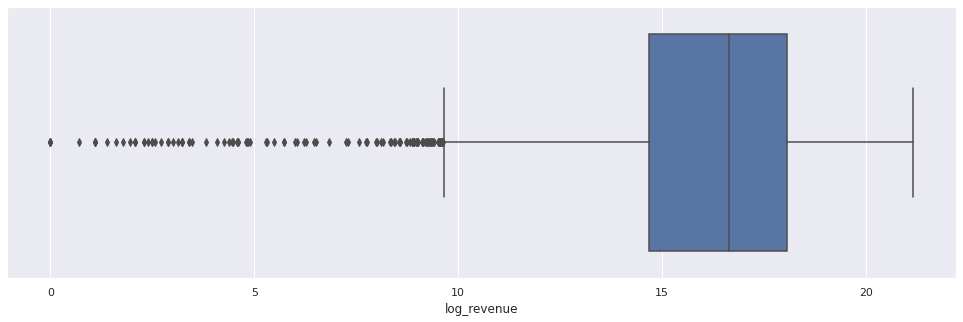

In [41]:
fig = plt.figure(figsize=(17, 5))
ax = fig.add_subplot(111)
sns.boxplot(x=train_set['log_revenue'])

Considering the `log_revenue` it's visible that outlier are not so many and that there are outliers in the lower part of the revenue 

In [42]:
factor = 2
log_upper_lim = train_set['log_revenue'].mean () + train_set['log_revenue'].std () * factor
log_lower_lim = train_set['log_revenue'].mean () - train_set['log_revenue'].std () * factor
print("log upper_lim:", log_upper_lim)
print("log lower_lim:", log_lower_lim)

log upper_lim: 22.102539931972085
log lower_lim: 9.817249008828753


Movie with `log_revenue` less than `log lower_lim` will be discarded, so we won't consider movies with a revenue lower than $e^{\text{log_lower_lim}}$. Those points will be considered noise points.

In [43]:
print("The lower bound is: ", np.power(np.e, log_lower_lim))

The lower bound is:  18347.50741990544


### Regression model
We are now going to define the regression model and the set of feauters on which it will be trained, but to ensure that it is well trained and it is not overfitted we have to divide the `train_set` in 2 parts, the first part (2500 movies) will be used for actual training, while the second part (500 movies) will be used for validation. This operation is important because we may have a very high $R^2$ score in training (~1) but then does not predict good neverseen values. The result of the prediction of the validation set will be compared to the real revenue  values in order to understand if the model is overfitted or not and how much it is able to predict new values.
We will also normalize the features because otherwise some value will completely overshadow the others. For example `budget` contains values up to $10^8$ while `homepage` has values $\in \{0, 1\}$

In [44]:
features = [genre for genre in GENRES]
features.extend(['n_genres', 'runtime', 'popularity', 'belongs_to_collection', 'year', 'quarter', 'homepage', 'budget', 'tagline'])
features.extend([country for country in PROD_COUNTRIES])
features.extend([company for company in PROD_COMPANIES])
features.extend(['famous_actors', 'has_famous_director'])
features.extend([lang for lang in LANGUAGES])
X = train_set[features][:2500]
y = [train_set['revenue'][c] for c in range(2500) if train_set['revenue'][c] <= upper_lim and train_set['log_revenue'][c] >= log_lower_lim]#train_set['revenue'][:2500]

for feature in features:
    MAX = train_set[feature].max()
    MIN = train_set[feature].min()

    X[feature] = (X[feature]-MIN)/(MAX-MIN)

X = X.fillna(0)

for rev,log_rev,ID in zip(train_set['revenue'][:2500], train_set['log_revenue'][:2500], range(len(X))):
    if (rev > upper_lim or log_rev < log_lower_lim):
        X = X.drop(ID)

model = LinearRegression(fit_intercept=False, positive=True)
model.fit(X, y)
train_set['predicted'] = [0 for x in train_set['revenue']]
train_set['predicted'][:len(X)] = model.predict(X)
print("linear regression train score R^2:", model.score(X, y))

linear regression train score R^2: 0.726620735859105


<AxesSubplot:>

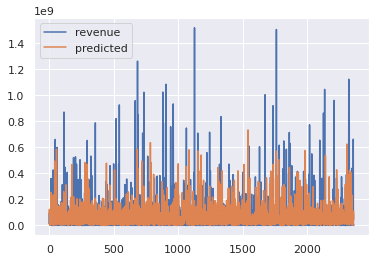

In [45]:
train_set[['revenue', 'predicted']][:len(X)].plot()

In [46]:
X = train_set[features][2500:]
y = train_set['revenue'][2500:]

for feature in features:
    MAX = train_set[feature].max()
    MIN = train_set[feature].min()

    X[feature] = (X[feature]-MIN)/(MAX-MIN)

X = X.fillna(0)


#for director in DIRECTORS:
#    X[director] = X[director]*10

train_set['predicted'][2500:] = model.predict(X)

<AxesSubplot:>

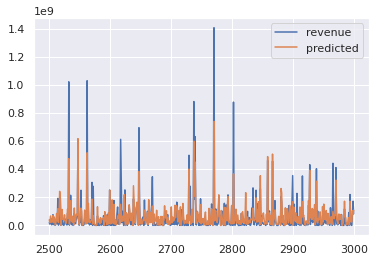

In [47]:
train_set[['revenue','predicted']][2500:].plot()

In [48]:
print("The correlation coefficient between the predicted values ad the real revenue is:")
train_set['revenue'][2500:].corr(train_set['predicted'][2500:])

The correlation coefficient between the predicted values ad the real revenue is:


0.8526170469501998

The correlation coefficient is high, this means that the predicted revenue and the real revenue are similar in general, this is a good result.

In [49]:
from sklearn.metrics import r2_score
print("R² score : %.3f" % r2_score(y,train_set['predicted'][2500:]))

R² score : 0.681


The above results suggest that the model is not underfitted nor overffitted, in  fact the $R^2$ score of the training are similar and the error is not too high. It is also to be considered that movies and their revenue is often heavily influenced by human factors such as trends and historical period that are not easy to represent and are not deducible from this dataset. An easy example is that movies in this dataset are updated to 2017 and for sure this regression model will not predict the spreading of COVID-19. The model has learned that as the year grows also the revenue grows, but in 2020 the film industry has suffered an estimated loss of $32 Billions ([source](https://finance.yahoo.com/news/2020-review-much-money-did-130020434.html?guccounter=1&guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAALwCkJ3IfOU6YcL2oy0OdQ8i3KWJhjKooxpEgTtRwyL98rLEWmg6KWKsd3bZNyxSAl20fbzfwqio4au-foJTaAdUT7LhnXMIkTPRVjoB4uOMDajed8rvWEo4o0ELLE_NrLbkqrnG9zAve-4o-uJZy27AVGYGYOcOde0f-6FGbt1c)).  

In [50]:
train_set[['title', 'revenue', 'predicted']][2500:].sort_values('predicted', ascending=False).head()

,title,revenue,predicted
2770,Avengers: Age of Ultron,1405403694,7.387808e+08
2547,I Am Legend,585349010,6.168081e+08
2737,Spectre,880674609,5.994378e+08
2562,Finding Dory,1028570889,5.163438e+08
2866,National Treasure: Book of Secrets,457363168,5.069636e+08


In [51]:
X = test_set[features]
for feature in features:
    MAX = test_set[feature].max()
    MIN = test_set[feature].min()
    X[feature] = (X[feature]-MIN)/(MAX-MIN)
    
X = X.fillna(0)


In [52]:
test_set['revenue'] = model.predict(X)

In [53]:
test_set[['title', 'revenue']].sort_values('revenue', ascending=False).head(15)

,title,revenue
1906,Harry Potter and the Deathly Hallows: Part 1,1.232276e+09
3135,Harry Potter and the Deathly Hallows: Part 2,1.056036e+09
2643,Harry Potter and the Order of the Phoenix,9.613076e+08
2655,Harry Potter and the Goblet of Fire,9.147133e+08
1796,X-Men: Days of Future Past,8.866738e+08
3198,Harry Potter and the Philosopher's Stone,8.599212e+08
3795,Toy Story 3,8.356253e+08
3867,The Hobbit: The Battle of the Five Armies,8.024531e+08
1589,Captain America: Civil War,7.902158e+08
1645,Star Wars: The Force Awakens,7.847099e+08


The above table shows the top 15 most profitable movies of the `test_set` using the trained Regression model. All the movies in this list are renowned, so the result is good.

At this point of the notebook we are going to insert a new film with custom features and then we will predict its revenue. After the prediction we will recommend an actor to add and a director (if the director is not already good).   
At the end the inserted movie with the actor  and the director added will be  evaluated to see if our recommendation was good or not, with respect to the revenue.

In [121]:
genres = input("Movie genre/s? ").split(',')
runtime = input('Runtime? (in minutes) ')
popularity = input('Popularity? ')
belongs_to_collection = input('Belongs to collection? [y/n] ')
release_year = input('Release year? ')
release_month = input('Release month? ')
prod_companies = input('Production companies? ').split(',')
prod_countries = input('Production countries? ').split(',')
actors = input('Actors? ').split(',')
directors = input('Directors? ').split(',')
budget = input('Budget? ')
has_homepage = input('Has homepage? [y/n] ')
has_tagline = input('Has tagline? [y/n] ')
keywords = input("Keywords? ").split(',')
langs = input("Languages? ").split(',')

Movie genre/s?  
Runtime? (in minutes)  100
Popularity?  100
Belongs to collection? [y/n]  y
Release year?  2010
Release month?  6
Production companies?  
Production countries?  United States of America
Actors?  Robert Downey Jr.,Chris Hemsworth,Scarlett Johansson,Chris Evans,Matthew McConaughey,Scarlett Johansson,Jack Black,Dwayne Johnson,Chris Hemsworth,Sylvester Stallone,Arnold Schwarzenegger,Adam Sandler,Jennifer Aniston
Directors?  
Budget?  100000000
Has homepage? [y/n]  y
Has tagline? [y/n]  y
Keywords?  
Languages?  English


In [122]:
belongs_to_collection = 1 if belongs_to_collection == 'y' else 0
has_homepage = 1 if has_homepage == 'y' else 0
has_tagline = 1 if has_tagline == 'y' else 0
release_quarter = int(int(release_month)/4)+1
n_genres = len(genres)
movie_to_predict = [1 if genre in genres else 0 for genre in GENRES]
movie_to_predict.extend([n_genres, runtime, popularity, belongs_to_collection, release_year, release_quarter, has_homepage, budget, has_tagline])
movie_to_predict.extend([1 if country in prod_countries else 0 for country in PROD_COUNTRIES])
movie_to_predict.extend([1 if company in prod_companies else 0 for company in PROD_COMPANIES])
movie_to_predict.extend([len(CAST.intersection(actors))])
movie_to_predict.extend([1 if any(DIRECTORS.intersection(directors)) else 0])
movie_to_predict.extend([1 if lang in langs else 0 for lang in LANGUAGES])
movie_to_predict.extend([1 if actor in actors else 0 for actor in CAST])
movie_to_predict.extend([1 if director in directors else 0 for director in DIRECTORS])
movie_to_predict.extend([1 if keyword in keywords else 0 for keyword in KEYWORDS])

features_corr = features[:]
features_corr.extend([actor for actor in CAST])
features_corr.extend([director for director in DIRECTORS])
features_corr.extend([keyword for keyword in KEYWORDS])

data = {}
c=0
for f in features_corr:
    data[f] = int(movie_to_predict[c])
    c += 1

movie2p_df = pd.DataFrame(data=data, index=range(1))
X = movie2p_df[:]
for feature in features:
    MAX = train_set[feature].max()
    MIN = train_set[feature].min()
    X[feature] = (movie2p_df[feature]-MIN)/(MAX-MIN)

We now predict the revenue of the inserted movie using the regression model.

In [123]:
movie2p_df['revenue'] = model.predict(X[features])
movie2p_df['revenue'][0]


221123605.79668596

In [109]:
add_columns(CAST,'cast')
add_columns(DIRECTORS, 'directors')
add_columns(KEYWORDS, 'Keywords')

In [110]:
X_train = train_set[features_corr][:]

for feature in features:
    MAX = train_set[feature].max()
    MIN = train_set[feature].min()

    X_train[feature] = (X_train[feature]-MIN)/(MAX-MIN)

X_train = X_train.fillna(0)

The list below represents the features that we will consider for comparison with the movies in the `train_set`

In [124]:
only_true_features = []
for f in features_corr:
    if movie2p_df[f].loc[0] != 0:
        only_true_features.extend([f])
movie2p_df.loc[0][only_true_features]

n_genres                            1.0
runtime                           100.0
popularity                        100.0
belongs_to_collection               1.0
year                             2010.0
quarter                             2.0
homepage                            1.0
budget                      100000000.0
tagline                             1.0
United States of America            1.0
famous_actors                      11.0
English                             1.0
Adam Sandler                        1.0
Scarlett Johansson                  1.0
Matthew McConaughey                 1.0
Jennifer Aniston                    1.0
Jack Black                          1.0
Chris Hemsworth                     1.0
Chris Evans                         1.0
Robert Downey Jr.                   1.0
Arnold Schwarzenegger               1.0
Dwayne Johnson                      1.0
Name: 0, dtype: float64

In [125]:
correlations=[]
for c in range(len(X_train)):
    correlations.extend([X[only_true_features].loc[0].corr(X_train[only_true_features].loc[c])])
correlations = pd.Series(data=correlations,name="correlation")

In [126]:
correlations = correlations.sort_values(ascending=False)
correlations.head(3000)


2852    0.283474
2890    0.267979
2015    0.263347
825     0.263093
270     0.247209
          ...   
2153   -0.421563
1101   -0.425488
1689   -0.452453
92     -0.468924
2554   -0.501175
Name: correlation, Length: 3000, dtype: float64

This list contains the index of the movie in the `train_set` and its correlation (so its  similarity) with the inserted movie, ordered by the value of correlation in descending order (so the first element is the most similar). 

In [127]:
train_set['title'].loc[correlations.index[0]]

'Goon'

In [128]:
train_set[only_true_features].loc[correlations.index[0]]


n_genres                       1.000000
runtime                       92.000000
popularity                     8.817924
belongs_to_collection          1.000000
year                        2012.000000
quarter                        1.000000
homepage                       1.000000
budget                         0.000000
tagline                        1.000000
United States of America       1.000000
famous_actors                  5.000000
English                        1.000000
Adam Sandler                   0.000000
Scarlett Johansson             0.000000
Matthew McConaughey            0.000000
Jennifer Aniston               0.000000
Jack Black                     0.000000
Chris Hemsworth                0.000000
Chris Evans                    0.000000
Robert Downey Jr.              0.000000
Arnold Schwarzenegger          0.000000
Dwayne Johnson                 0.000000
Name: 2852, dtype: float64

In [129]:
def suggest_person(SET, category, already_in):
    person_to_add = None
    for i in range(len(correlations)):
        index = correlations.index[i]
        if train_set['revenue'].loc[index] > movie2p_df['revenue'].loc[0]:
            for person in train_set[category].loc[index]:
                if person in SET and not person in already_in:
                    person_to_add = person
                    already_in = already_in.extend([person_to_add])
                    return person_to_add

actors_to_add = []
actors_to_add.extend([suggest_person(CAST, 'cast', actors)])
actors_to_add.extend([suggest_person(CAST, 'cast', actors)])
actors_to_add.extend([suggest_person(CAST, 'cast', actors)])


print("I suggest you these actors to have a higher revenue: ", actors_to_add)

I suggest you these actors to have a higher revenue:  ['Ray Romano', 'John Leguizamo', 'Denis Leary']


In [130]:
director_to_add = None if movie2p_df['has_famous_director'][0] == 1 else suggest_person(DIRECTORS, 'directors', directors)

if director_to_add != None:
    print("I suggest you this director to have a higher revenue: ", director_to_add)
else:
    print("You already have a good director for this movie")

I suggest you this director to have a higher revenue:  Daniel Myrick


In [120]:
movie2p_df['famous_actors'] += 3
movie2p_df['has_famous_director'] = 1

X = movie2p_df[:]
for feature in features:
    MAX = train_set[feature].max()
    MIN = train_set[feature].min()
    X[feature] = (movie2p_df[feature]-MIN)/(MAX-MIN)
new_prediction = model.predict(X[features])
print(f"Thanks to the recommendation you have gained {int(new_prediction - movie2p_df['revenue'][0])} $")

Thanks to the recommendation you have gained 10592150 $


After the recommendation the movie earned a lot more money, so the recommedation was effective

# Comparison

On www.kaggle.com there are many solution to the prediction of box-office revenue, but we will consider the most voted one since it is probably one of the best prediction model.   
In [this](https://www.kaggle.com/artgor/eda-feature-engineering-and-model-interpretation) notebook the author has analyzed the dataset in a similar way as we have done. For example he has done similar analysis for features like `belongs_to_collection` or `homepage`; but he has considered `Keywords` in a more datailed way (but he has considered the most common keywords like we have done). He has counted the number of actors for each movie, we have done a similar thing but we have taken into account only the number of 'famous' actors. He has also used TF-IDF to extract information out of the overview.    
The big difference with our model is that the author hasn't used the classic `LinearRegression`, but he used `LGBMRegressor`, `SHAP` and `ELI5`:
- [LGBMRegressor](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMRegressor.html) : Light GBM is a gradient boosting framework that uses tree based learning algorithm. It differs from others learning algorithms  because Light GBM grows tree leaf-wise while other algorithm grows level-wise ([source](https://medium.com/@pushkarmandot/https-medium-com-pushkarmandot-what-is-lightgbm-how-to-implement-it-how-to-fine-tune-the-parameters-60347819b7fc));
- [SHAP](https://shap.readthedocs.io/en/latest/index.html): SHAP (SHapley Additive exPlanations) is a game theoretic approach to explain the output of any machine learning model;
- [ELI5](https://eli5.readthedocs.io/en/latest/): ELI5 is a Python library which allows to visualize and debug various Machine Learning models using unified API.



The author also extracted a .csv file out of its prediction on the `test_set`. We can use that file to compute the correlation among his and our results. 


In [137]:
comp_df = pd.read_csv('Comparison Data/lgb.csv')
comp_df.head()

,id,revenue
0,3001,4.681238e+06
1,3002,1.532117e+06
2,3003,8.921669e+06
3,3004,1.516596e+07
4,3005,8.991190e+05


In [135]:
test_set[['id','revenue']].head()

,id,revenue
0,3001,2.949627e+07
1,3002,1.030697e+06
2,3003,4.759808e+07
3,3004,1.423365e+07
4,3005,1.343407e+07


In [133]:
comp_df['revenue'].corr(test_set['revenue'])

0.8639412708133855

As we can the correlation is high (~1), so his model may be more accurate thanks to the *LGBMRegressor* but in general our model works well, too. 